In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
# dropping the unknown salary figures
df = df[df.Salary != 0]

In [4]:
df.Salary.describe()

count     2605.000000
mean      5938.203972
std       2868.774864
min        222.000000
25%       4000.000000
50%       5500.000000
75%       6906.916327
max      25000.000000
Name: Salary, dtype: float64

In [5]:
# which joker put 222 as the salary?
df[df.Salary < 500].head()

,Company,Address,Description,Salary,title_Data Analyst,title_Analyst(others),title_Business Analyst,title_Data Scientist,title_Reseach Scientist,title_Data(others),...,seniority_Junior Executive,seniority_Manager,seniority_Entry Level,seniority_Professional,seniority_Executive,seniority_Senior Manager,industry_Human Resources Management/Consulting,industry_Information Technology,industry_Banking and Finance,industry_R&D
326,Smartblock Pte Ltd,Unknown,Unknown,475.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
656,Kelly Services S Pte Ltd,Unknown,Unknown,396.0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1412,PrimusTech Private Limited,Unknown,"Contract, TemporaryDiploma, Bachelor's / Honou...",222.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,Borden Company Pte Ltd,Unknown,"PermanentBachelor's / Honours, Masters / PhDBr...",228.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3159,GROUP NAUTICAL PTE LIMITED,ECENTRE REDHILL JALAN BUKIT MERAH,InternshipRequirementsSkills and Qualification...,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df = df[df.Salary > 1500]
df.reset_index(drop=True, inplace=True)

In [7]:
df.Salary.describe()

count     2580.000000
mean      5986.463312
std       2839.956296
min       1550.000000
25%       4000.000000
50%       5500.000000
75%       6906.916327
max      25000.000000
Name: Salary, dtype: float64

In [8]:
df['Salary'] = df.Salary.astype(int)

In [9]:
df.dtypes

Company                                            object
Address                                            object
Description                                        object
Salary                                              int32
title_Data Analyst                                  int64
title_Analyst(others)                               int64
title_Business Analyst                              int64
title_Data Scientist                                int64
title_Reseach Scientist                             int64
title_Data(others)                                  int64
title_Business(others)                              int64
title_Data Engineer                                 int64
location_Across                                     int64
location_Central                                    int64
location_West                                       int64
location_East                                       int64
location_North                                      int64
location_Overs

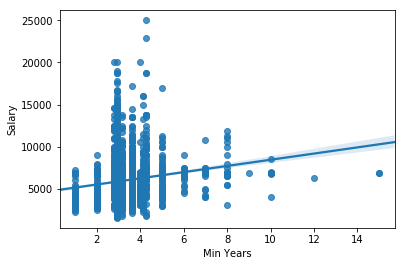

In [10]:
sns.regplot(df['Min Years'], df.Salary)

Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df.Salary, test_size=0.2, random_state=322)

In [12]:
def scorer(nlp, method, column):
    nlp.fit(X_train[column], y_train)
    method.fit(nlp.transform(X_train[column]), y_train)
    print('The mean salary prediction error is {}'.format(int(abs(method.predict(nlp.transform(X_test[column])) - y_test).mean())))
    print('The score is {:.4f}'.format(method.score(nlp.transform(X_test[column]), y_test)))

In [13]:
nlps = [(HashingVectorizer(ngram_range=(1,2)), 'Hashing Vectorizer'), 
        (TfidfVectorizer(ngram_range=(1,2)), 'Tfidf Vectorizer'), 
        (CountVectorizer(ngram_range=(1,2)), 'Count Vectorizer')]

In [14]:
methods = [(LinearRegression(), 'Linear Regression'),
           (Lasso(), 'Lasso'), 
           (Ridge(), 'Ridge'),]

A quick look at several vectorizing methods and how well the individual text columns predict salary based on different regression models

In [15]:
for nlp in nlps:
    for method in methods:
        print('For '+ nlp[1] + ', ' + method[1] + ',')
        try:
            scorer(nlp[0], method[0], 'Company')
        except:
            print('error error')
        print('-'*20)

For Hashing Vectorizer, Linear Regression,
The mean salary prediction error is 1756
The score is 0.2497
--------------------
For Hashing Vectorizer, Lasso,
The mean salary prediction error is 1750
The score is 0.3030
--------------------
For Hashing Vectorizer, Ridge,
The mean salary prediction error is 1741
The score is 0.3071
--------------------
For Tfidf Vectorizer, Linear Regression,
The mean salary prediction error is 1799
The score is 0.2191
--------------------
For Tfidf Vectorizer, Lasso,
The mean salary prediction error is 1788
The score is 0.2781
--------------------
For Tfidf Vectorizer, Ridge,
The mean salary prediction error is 1797
The score is 0.2617
--------------------
For Count Vectorizer, Linear Regression,
The mean salary prediction error is 1760
The score is 0.2485
--------------------
For Count Vectorizer, Lasso,
The mean salary prediction error is 1728
The score is 0.3009
--------------------
For Count Vectorizer, Ridge,
The mean salary prediction error is 1732


In [16]:
for nlp in nlps:
    for method in methods:
        print('For '+ nlp[1] + ', ' + method[1] + ',')
        try:
            scorer(nlp[0], method[0], 'Address')
        except:
            print('error error')
        print('-'*20)

For Hashing Vectorizer, Linear Regression,
The mean salary prediction error is 1964
The score is 0.0891
--------------------
For Hashing Vectorizer, Lasso,
The mean salary prediction error is 1907
The score is 0.1614
--------------------
For Hashing Vectorizer, Ridge,
The mean salary prediction error is 1898
The score is 0.1857
--------------------
For Tfidf Vectorizer, Linear Regression,
The mean salary prediction error is 1980
The score is 0.0759
--------------------
For Tfidf Vectorizer, Lasso,
The mean salary prediction error is 1935
The score is 0.1412
--------------------
For Tfidf Vectorizer, Ridge,
The mean salary prediction error is 1909
The score is 0.1740
--------------------
For Count Vectorizer, Linear Regression,
The mean salary prediction error is 1973
The score is 0.0696
--------------------
For Count Vectorizer, Lasso,
The mean salary prediction error is 1896
The score is 0.1640
--------------------
For Count Vectorizer, Ridge,
The mean salary prediction error is 1901


In [17]:
# holy shit this one takes years to run
for nlp in nlps:
    for method in methods:
        print('For '+ nlp[1] + ', ' + method[1] + ',')
        try:
            scorer(nlp[0], method[0], 'Description')
        except:
            print('error error')
        print('-'*20)

For Hashing Vectorizer, Linear Regression,
The mean salary prediction error is 2051
The score is -0.0128
--------------------
For Hashing Vectorizer, Lasso,
The mean salary prediction error is 1741
The score is 0.3507
--------------------
For Hashing Vectorizer, Ridge,
The mean salary prediction error is 1664
The score is 0.4012
--------------------
For Tfidf Vectorizer, Linear Regression,
The mean salary prediction error is 1836
The score is 0.2044
--------------------
For Tfidf Vectorizer, Lasso,
The mean salary prediction error is 1710
The score is 0.3825
--------------------
For Tfidf Vectorizer, Ridge,
The mean salary prediction error is 1615
The score is 0.4485
--------------------
For Count Vectorizer, Linear Regression,
The mean salary prediction error is 1989
The score is -0.0009
--------------------
For Count Vectorizer, Lasso,


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The mean salary prediction error is 1999
The score is 0.0255
--------------------
For Count Vectorizer, Ridge,
The mean salary prediction error is 1611
The score is 0.4072
--------------------


The general takeaway seems to be that regardless of vectorizing method, Ridge consistently outperforms the other regression models. That said, for both the 'Company' and 'Address' columns, Hashing Vectorizer scores the highest on average, while Tfidf performs the best for the 'Description' column. However, as the feature names cannot be gotten from the hashing vectorizer, Count Vectorizer will be used instead.

In [18]:
cv = CountVectorizer(ngram_range=(1,2))
tfid = TfidfVectorizer(ngram_range=(1,2), min_df=5)

In [19]:
X_test.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

In [20]:
cv.fit(X_train.Company)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
X_test = pd.concat([X_test, pd.DataFrame(cv.transform(X_test.Company).todense(), columns=['company_'+name for name in cv.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(cv.transform(X_train.Company).todense(), columns=['company_'+name for name in cv.get_feature_names()])], axis=1)

In [22]:
X_test.drop('Company', axis=1, inplace=True)
X_train.drop('Company', axis=1, inplace=True)

In [23]:
cv.fit(X_train.Address)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
X_test = pd.concat([X_test, pd.DataFrame(cv.transform(X_test.Address).todense(), columns=['address_'+name for name in cv.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(cv.transform(X_train.Address).todense(), columns=['address_'+name for name in cv.get_feature_names()])], axis=1)

In [25]:
X_test.drop('Address', axis=1, inplace=True)
X_train.drop('Address', axis=1, inplace=True)

In [26]:
tfid.fit(X_train.Description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
X_test = pd.concat([X_test, pd.DataFrame(tfid.transform(X_test.Description).todense(), columns=['description_'+name for name in tfid.get_feature_names()])], axis=1)
X_train = pd.concat([X_train, pd.DataFrame(tfid.transform(X_train.Description).todense(), columns=['description_'+name for name in tfid.get_feature_names()])], axis=1)

In [28]:
X_test.drop('Description', axis=1, inplace=True)
X_train.drop('Description', axis=1, inplace=True)

In [29]:
X_train.shape

(2064, 22752)

In [30]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.5210170572256003

In [31]:
print('The mean salary prediction error is {:.2f} dollars.'.format(abs(ridge.predict(X_test) - y_test).mean()))

The mean salary prediction error is 1410.47 dollars.


In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.16279069767441862

In [33]:
print('The mean salary prediction error is {:.2f} dollars.'.format(abs(rfc.predict(X_test) - y_test).mean()))

The mean salary prediction error is 1901.34 dollars.


As can be seen from above, random forest classifier does a poor job of predicting the salary from the data compared to ridge regression.

In [34]:
df.columns

Index(['Company', 'Address', 'Description', 'Salary', 'title_Data Analyst',
       'title_Analyst(others)', 'title_Business Analyst',
       'title_Data Scientist', 'title_Reseach Scientist', 'title_Data(others)',
       'title_Business(others)', 'title_Data Engineer', 'location_Across',
       'location_Central', 'location_West', 'location_East', 'location_North',
       'location_Overseas', 'Min Years', 'seniority_Senior Executive',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Entry Level', 'seniority_Professional',
       'seniority_Executive', 'seniority_Senior Manager',
       'industry_Human Resources Management/Consulting',
       'industry_Information Technology', 'industry_Banking and Finance',
       'industry_R&D'],
      dtype='object')

In [35]:
coefs = sorted(list(zip(ridge.coef_, X_test.columns)), reverse=True)

From here we can see that company names that have 'novartis', 'macdonald', 'billigence', 'marall' and 'lego' in it are the highest paying companies.

In [36]:
[(i,j) for i,j in coefs if 'company' in j][:10]

[(3056.4346772799363, 'company_novartis singapore'),
 (3056.4346772799363, 'company_novartis'),
 (1992.3175441358082, 'company_macdonald and'),
 (1992.3175441358082, 'company_macdonald'),
 (1992.3175441358082, 'company_and company'),
 (1869.8043662497787, 'company_billigence'),
 (1737.3330632651214, 'company_marall services'),
 (1737.3330632651214, 'company_marall'),
 (1611.7605472707617, 'company_lego singapore'),
 (1611.7605472707617, 'company_lego')]

On the other hand, companies with the words 'ascent', 'cloak', 'zendesk', 'power' and 'trakomatic' are likely to pay less.

In [37]:
[(i,j) for i,j in coefs if 'company' in j][:-12:-1]

[(-1018.0200240004194, 'company_ascent'),
 (-1018.0200240004194, 'company_ascent asia'),
 (-1018.0200240004194, 'company_pulley'),
 (-1018.0200240004194, 'company_pulley ascent'),
 (-954.159989343352, 'company_cloak'),
 (-954.159989343352, 'company_cloak pte'),
 (-940.2367724532891, 'company_zendesk'),
 (-940.2367724532891, 'company_zendesk singapore'),
 (-931.5752381462089, 'company_power'),
 (-864.8328610494094, 'company_trakomatic'),
 (-864.8328610494094, 'company_trakomatic pte')]

Likewise for address

In [38]:
[(i,j) for i,j in coefs if 'address' in j][:10]

[(1595.3420388963318, 'address_square north'),
 (1595.3420388963318, 'address_parkview square'),
 (1595.3420388963318, 'address_parkview'),
 (1454.745522783558, 'address_malaysia kl'),
 (1454.745522783558, 'address_kl'),
 (1310.454295586454, 'address_malaysia'),
 (1170.1933844999512, 'address_two'),
 (1170.1933844999512, 'address_tower two'),
 (1165.2501950423407, 'address_comcentre exeter'),
 (1122.4401360803292, 'address_exeter road')]

In [39]:
[(i,j) for i,j in coefs if 'address_' in j][:-10:-1]

[(-1272.8706465525738, 'address_centre eunos'),
 (-1257.9597875540617, 'address_street singapore'),
 (-789.0102858596272, 'address_industrial'),
 (-787.3868463393494, 'address_quay ocean'),
 (-736.6824418952039, 'address_place singapore'),
 (-703.0656461974577, 'address_four temasek'),
 (-688.1570076281262, 'address_one harbourfront'),
 (-623.3400370841141, 'address_octagon the'),
 (-623.3400370841141, 'address_the cecil')]

Description

In [40]:
[(i,j) for i,j in coefs if 'description_' in j][:10]

[(2014.3410928904343, 'description_trading'),
 (1925.410702310025, 'description_india'),
 (1836.143810089632, 'description_across'),
 (1683.2726268059628, 'description_strategy'),
 (1654.5923220469556, 'description_integration'),
 (1565.2964857182817, 'description_banking'),
 (1559.4319585982282, 'description_power'),
 (1525.3253689314356, 'description_engagements'),
 (1476.889930147725, 'description_digital'),
 (1431.126114983525, 'description_lead')]

Title

In [41]:
[(i,j) for i,j in coefs if 'title_' in j][:10]

[(489.7950873178197, 'title_Data Scientist'),
 (-46.406222262347455, 'title_Reseach Scientist'),
 (-283.199403140361, 'title_Business Analyst'),
 (-288.4182772403474, 'title_Data(others)'),
 (-406.54162611650963, 'title_Analyst(others)'),
 (-477.05193889405837, 'title_Business(others)'),
 (-536.4921517676657, 'title_Data Analyst'),
 (-943.4706781196105, 'title_Data Engineer')]

Location

In [42]:
[(i,j) for i,j in coefs if 'location_' in j][:10]

[(328.9624543450375, 'location_North'),
 (166.99091926197798, 'location_Across'),
 (101.70655770972235, 'location_East'),
 (34.17442868144508, 'location_West'),
 (-85.76452403453641, 'location_Central'),
 (-1034.5880066725479, 'location_Overseas')]

Seniority

In [43]:
[(i,j) for i,j in coefs if 'seniority_' in j][:10]

[(2390.294879153078, 'seniority_Senior Manager'),
 (1381.2466405631822, 'seniority_Manager'),
 (1018.7158034697004, 'seniority_Professional'),
 (371.03753027667517, 'seniority_Senior Executive'),
 (-588.5244881946774, 'seniority_Executive'),
 (-679.8133285493382, 'seniority_Junior Executive'),
 (-1183.0016292407854, 'seniority_Entry Level')]

Industry

In [44]:
[(i,j) for i,j in coefs if 'industry_' in j][:10]

[(602.5669375734979, 'industry_Banking and Finance'),
 (503.34916551437254, 'industry_Information Technology'),
 (359.5772587832471, 'industry_Human Resources Management/Consulting'),
 (254.81243094445335, 'industry_R&D')]

Moving on to attempting to predict job title using the other categories:

In [45]:
df.columns

Index(['Company', 'Address', 'Description', 'Salary', 'title_Data Analyst',
       'title_Analyst(others)', 'title_Business Analyst',
       'title_Data Scientist', 'title_Reseach Scientist', 'title_Data(others)',
       'title_Business(others)', 'title_Data Engineer', 'location_Across',
       'location_Central', 'location_West', 'location_East', 'location_North',
       'location_Overseas', 'Min Years', 'seniority_Senior Executive',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Entry Level', 'seniority_Professional',
       'seniority_Executive', 'seniority_Senior Manager',
       'industry_Human Resources Management/Consulting',
       'industry_Information Technology', 'industry_Banking and Finance',
       'industry_R&D'],
      dtype='object')

In [46]:
def dedummy(df):
    roles = [column.replace('title_', '') for column in df.columns if 'title_' in column]
    titles = df[[column for column in df.columns if 'title_' in column]]
    temp = []
    for k in range(len(titles)):
        if titles.loc[k].sum() == 0:
            temp.append('Unknown')
        else:
            temp.append([j for i,j in zip(titles.loc[k], roles) if i == 1][0])
    df['Title'] = temp
    
    for column in df.columns:
        if 'title_' in column:
            df.drop(column, axis=1, inplace=True)

In [47]:
dedummy(X_train)
dedummy(X_test)

In [48]:
y_train = X_train.Title
y_test = X_test.Title

In [49]:
X_train = X_train.drop('Title', axis=1)
X_test = X_test.drop('Title', axis=1)

In [50]:
logit = LogisticRegression()
logit.fit(X_train.to_sparse(), y_train)
logit.score(X_test, y_test)

0.563953488372093

In [51]:
y_train.value_counts()

Unknown              941
Business Analyst     389
Analyst(others)      244
Data Analyst         156
Data Scientist       110
Business(others)      85
Data(others)          72
Data Engineer         58
Reseach Scientist      9
Name: Title, dtype: int64

In [52]:
rfc.fit(X_train.to_sparse(), y_train)
rfc.score(X_test, y_test)

0.627906976744186

In [53]:
logit_coef = list(zip(logit.classes_, logit.coef_))

In [54]:
for i in logit_coef:
    print(i[0])
    print(sorted(list(zip(i[1], X_train.columns)), reverse=True)[:10])
    print('-'*100)

Analyst(others)
[(1.1564912821871474, 'location_North'), (1.0094123409426716, 'company_logistics'), (0.9845679839067102, 'company_bw'), (0.8851825224148218, 'company_aryan search'), (0.8851825224148218, 'company_aryan'), (0.865056760524203, 'company_globesoft'), (0.8344452291837253, 'description_finance'), (0.8087934482400587, 'company_johnson'), (0.7661683596514468, 'address_office tower'), (0.7517773076290258, 'industry_Human Resources Management/Consulting')]
----------------------------------------------------------------------------------------------------
Business Analyst
[(2.4086777625061067, 'description_business'), (1.5722370953406966, 'description_requirements'), (1.361121244696315, 'description_project'), (1.140266389743101, 'description_functional'), (1.1163686513238467, 'description_business analyst'), (1.0466451066910771, 'description_user'), (0.9542788829190403, 'industry_Banking and Finance'), (0.9487667338653153, 'description_analyst'), (0.929002892866074, 'company_myr

In [55]:
sorted(list(zip(rfc.feature_importances_, X_train.columns)), reverse=True)

[(0.0514654511871523, 'Min Years'),
 (0.009262154406926706, 'seniority_Senior Executive'),
 (0.007977979224138853, 'seniority_Junior Executive'),
 (0.007409375806181619, 'description_business'),
 (0.006412991466321019, 'description_data'),
 (0.0063920721071047525, 'description_unknown'),
 (0.006127336642870557, 'seniority_Manager'),
 (0.005357782141388946, 'description_analyst'),
 (0.0044707905273039285, 'location_Across'),
 (0.004225531255652175, 'location_Central'),
 (0.004057243203007693, 'description_data science'),
 (0.0038065491549929783, 'seniority_Entry Level'),
 (0.0033715870148742534, 'address_unknown'),
 (0.003327141197648661, 'description_functional'),
 (0.0030041095435515653, 'description_specifications'),
 (0.0028225063941470807, 'description_business analyst'),
 (0.002810355521388614, 'description_and'),
 (0.002802651139069838, 'industry_Human Resources Management/Consulting'),
 (0.0027087918758482562, 'description_development'),
 (0.002695593669877295, 'address_tower'),

In [56]:
df = pd.read_csv('nodrop_df.csv')
df = df[df.Salary > 1500]

# Report

In summary, this project was done with data on job postings scraped from jobscentral.com, jobstreet.com and myskillsfuture.sg. The data was combined into one data set, with the major columns after being Company (company name), Address (company address), Description (job description), Title (job title), Location (generalized location of office), Min Years (minimum years of experience), Seniority (seniority of role) and Industry (industry of job). Where viable missing values were replaced using averaged predictions from the other categories; otherwise the word 'Unknown' was put in place.

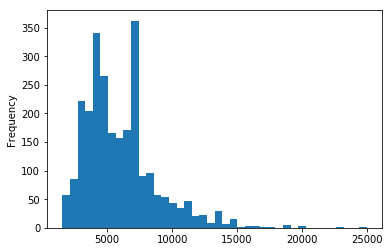

In [57]:
df.Salary.plot(kind='hist', bins=40)

For salary, the two primary spikes are due mainly to the nature of the data scraped, as the jobstreet data only revealed if the salary was above, below or around the expected salary. As the expected salary was 4000, there is a spike in values around that point. As for the 'above expected' and 'below expected' salary, the average salary for values above and below 4000 were taken and used as replacement, which explains the spike around the 7500 mark.

Below are some of the average salary plots based on the original data. Notably, the model scores these values differently.

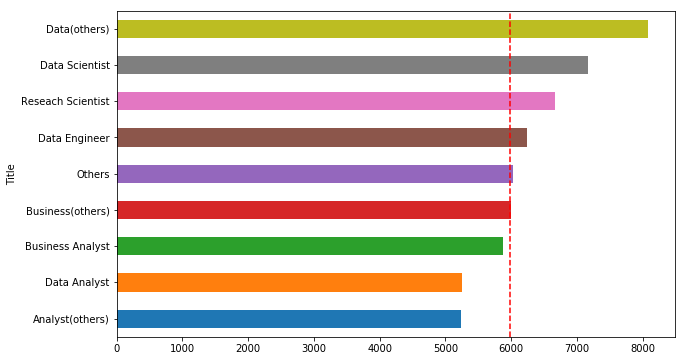

In [58]:
plt.figure(figsize = (10,6))
ax = df.groupby('Title').Salary.mean().sort_values().plot(kind='barh')
ax.axvline(df.Salary.mean(), ls='dashed', color='red')

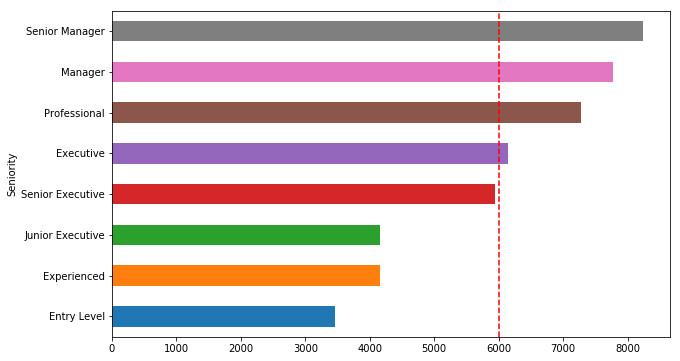

In [59]:
plt.figure(figsize = (10,6))
ax = df[df['Seniority'].isin(df.Seniority.value_counts().head(8).index)].groupby('Seniority').Salary.mean().sort_values().plot(kind='barh')
ax.axvline(df[df['Seniority'].isin(df.Seniority.value_counts().head(8).index)].Salary.mean(), ls='dashed', color='red')

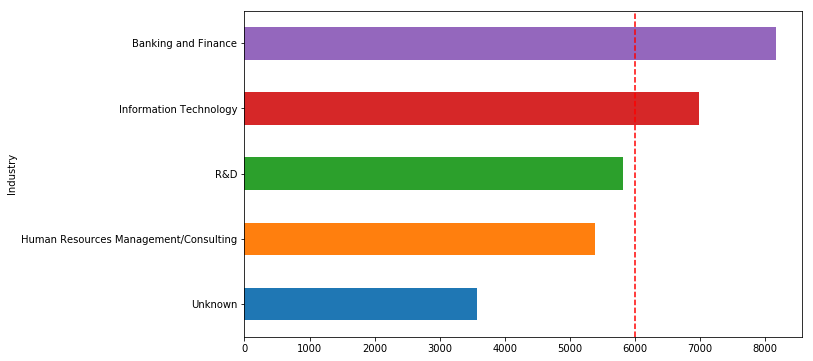

In [63]:
plt.figure(figsize = (10,6))
ax = df[df['Industry'].isin(df.Industry.value_counts().head().index)].groupby('Industry').Salary.mean().sort_values().plot(kind='barh')
ax.axvline(df[df['Industry'].isin(df.Industry.value_counts().head().index)].Salary.mean(), ls='dashed', color='red')

Below are the plots of some of the more distinct effects on salary

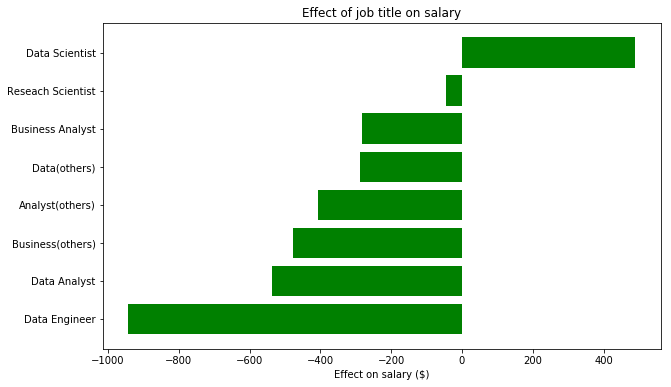

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len([j for i,j in coefs if 'title_' in j])), [i for i,j in coefs if 'title_' in j], align='center',
        color='green', ecolor='black')
ax.set_xlabel('Effect on salary ($)')
ax.set_title('Effect of job title on salary')
ax.invert_yaxis()
plt.yticks(range(len([j for i,j in coefs if 'title_' in j])),[j.replace('title_', '') for i,j in coefs if 'title_' in j])
plt.show()

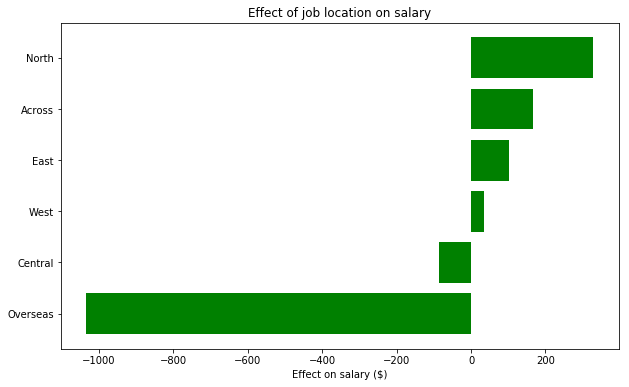

In [97]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len([j for i,j in coefs if 'location_' in j])), [i for i,j in coefs if 'location_' in j], align='center',
        color='green', ecolor='black')
ax.set_xlabel('Effect on salary ($)')
ax.set_title('Effect of job location on salary')
ax.invert_yaxis()
plt.yticks(range(len([j for i,j in coefs if 'location_' in j])),[j.replace('location_', '') for i,j in coefs if 'location_' in j])
plt.show()

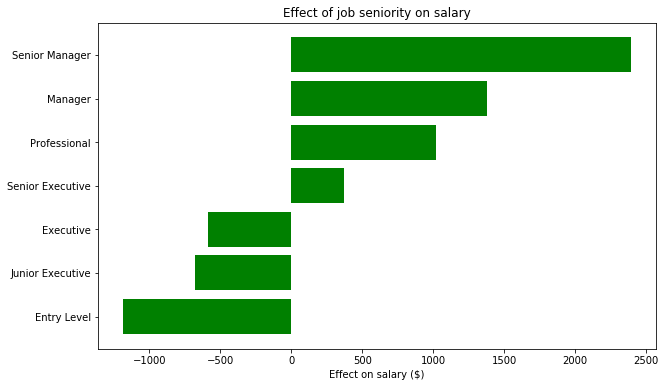

In [98]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len([j for i,j in coefs if 'seniority_' in j])), [i for i,j in coefs if 'seniority_' in j], align='center',
        color='green', ecolor='black')
ax.set_xlabel('Effect on salary ($)')
ax.set_title('Effect of job seniority on salary')
ax.invert_yaxis()
plt.yticks(range(len([j for i,j in coefs if 'seniority_' in j])),[j.replace('seniority_', '') for i,j in coefs if 'seniority_' in j])
plt.show()

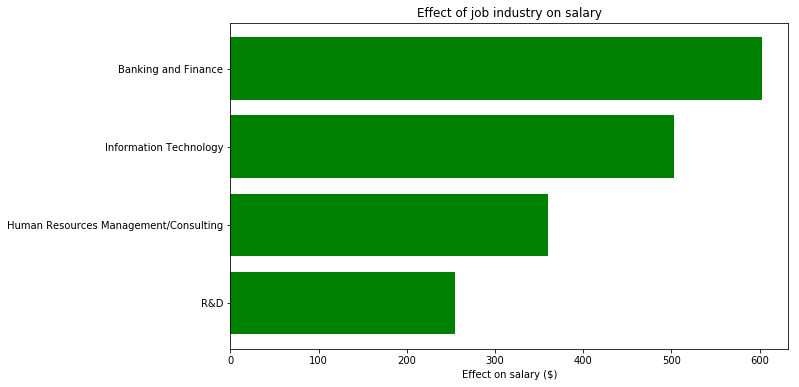

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(range(len([j for i,j in coefs if 'industry_' in j])), [i for i,j in coefs if 'industry_' in j], align='center',
        color='green', ecolor='black')
ax.set_xlabel('Effect on salary ($)')
ax.set_title('Effect of job industry on salary')
ax.invert_yaxis()
plt.yticks(range(len([j for i,j in coefs if 'industry_' in j])),[j.replace('industry_', '') for i,j in coefs if 'industry_' in j])
plt.show()